
# **Red neuronal convolucional**
Basado en [**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/).

Treball de Recerca d'Arnau Ayguadé. Institut Front Marítim. Barcelona

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## 1. Definimos la red convolucional

Definimos una primera capa convolucional seguida de una capa de MaxPooling (se incluye la opcion de añadir padding)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7, 7), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 16)        800       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 16)        0         
Total params: 800
Trainable params: 800
Non-trainable params: 0
_________________________________________________________________


Y luego añadimos una segunda capa convolucional, de nuevo seguida de una capa de MaxPooling

In [ ]:

model.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 16)        800       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 32)          25120     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 32)          0         
Total params: 25,920
Trainable params: 25,920
Non-trainable params: 0
_________________________________________________________________


Para finalmente añadir una capa densa precedida de una capa Flatten que nos transformara los tensores de salida de la ultima capa convolucional 3D en 1D

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 22, 22, 16)        800       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 32)          25120     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
__________________________________________________

# 2. Dataset y normalizacion
Cargamos el dataset MNIST, convirtiendo los atributos de entrada a tensores 3D y normalizamos. A continuación categorizamos los labels para clasificacion.


In [ ]:
from tensorflow.keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11501568/11490434 [==============================] - 0s 0us/step


# 3. Entrenamiento del modelo
Inicialmente preparado para usar el optimizador sgd, pero se podria optar por adam

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
#              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

Epoch 1/5
600/600 [==============================] - 35s 8ms/step - loss: 0.9601 - accuracy: 0.7490
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2621 - accuracy: 0.9226
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1861 - accuracy: 0.9461
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1479 - accuracy: 0.9570
Epoch 5/5
600/600 [==============================] - 5s 8ms/step - loss: 0.1250 - accuracy: 0.9636


# 4. Evaluación del modelo

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1019 - accuracy: 0.9701
Test accuracy: 0.9700999855995178


# 5. Nuevo modelo con mas capas
Optimizaciones: 1) padding; 2) nueva capa convolucional y mas filtros y nueva capa densa; 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [ ]:
model.compile(loss='categorical_crossentropy',
#              optimizer='sgd',
              optimizer='adam',
              metrics=['accuracy'])

EPOCHS = 30

history = model.fit(train_images, train_labels,
          batch_size=100,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose=1)

Epoch 1/30
480/480 [==============================] - 8s 14ms/step - loss: 0.2352 - accuracy: 0.9291 - val_loss: 0.0750 - val_accuracy: 0.9785
Epoch 2/30
480/480 [==============================] - 6s 12ms/step - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 3/30
480/480 [==============================] - 5s 11ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0355 - val_accuracy: 0.9901
Epoch 4/30
480/480 [==============================] - 6s 12ms/step - loss: 0.0308 - accuracy: 0.9899 - val_loss: 0.0356 - val_accuracy: 0.9909
Epoch 5/30
480/480 [==============================] - 6s 11ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0351 - val_accuracy: 0.9901
Epoch 6/30
480/480 [==============================] - 6s 12ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0407 - val_accuracy: 0.9872
Epoch 7/30
480/480 [==============================] - 5s 11ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0445 - val_accuracy: 0.9883

Evaluacion del modelo

In [ ]:
import pandas as pd

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.000010,1.0,0.050949,0.993000,25
26,0.000007,1.0,0.052042,0.992917,26
27,0.000006,1.0,0.052801,0.992833,27
28,0.000004,1.0,0.053634,0.992917,28
29,0.000003,1.0,0.054521,0.993083,29


In [ ]:
def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],'r--',
           label='Training')
  plt.plot(hist['epoch'], hist['val_accuracy'],'b',
           label = 'Validation')
  plt.ylim([0.9,1])
  plt.legend()
  plt.show()

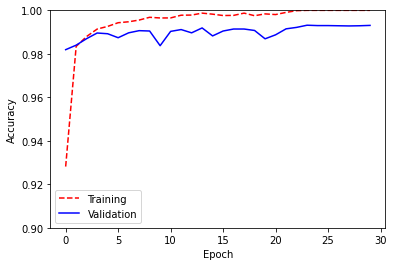

In [ ]:
plot_history(history)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9938
Test accuracy: 0.9937999844551086
